In [1]:
# Reading in neccessary packages
import pandas as pd
import numpy as np
from project_functions.analysis_functions import plot, mse, transform, saveModel, loadModel, modelTraining, createUsableDF, score, boostModel

# This package only neccessary if you would like to re-download the data int the nexyt
# import yahoo_finance as yf

In [2]:
# object = yf.Ticker('BAC')
# data = object.history(start="2000-01-01", end="2020-11-17")
# data.to_csv('Data/Raw Data/bankOfAmerica.csv')
data = pd.read_csv('Data/Raw Data/bankOfAmerica.csv', index_col='Date')

In [3]:
# This defines the numpy of days in the past we will use to predict the current price
LAG = 40

In [4]:
xTrain, yTrain, xTest, yTest, scaler = transform(data, LAG)

In [5]:
# model = modelTraining(2000, 10,xTrain, yTrain)
# saveModel(model, "bankOfAmericanModel", location='Data/Final Models')
model = loadModel(name="bankOfAmericanModel", location='Data/Final Models')

MSE Train: 0.19968414068607784
MSE Test: 0.5649578963815324


C:\Users\Aidan\Documents\GitRepositories\cmpt-353-stock-market-predictor\project_functions\analysis_functions.py:211: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


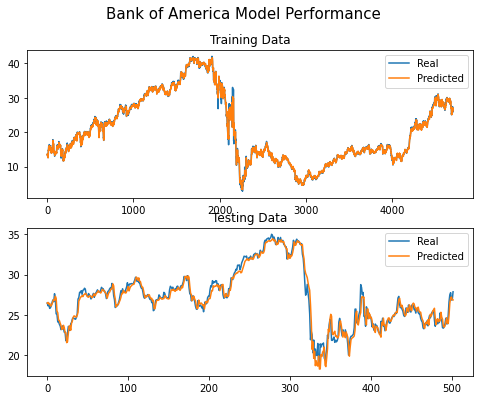

In [6]:
mseTrain, trainPreds, trainTruth = mse(xTrain,yTrain, model, scaler)
print("MSE Train:", mseTrain)

mseTest, testPreds, testTruth = mse(xTest,yTest, model, scaler)

print("MSE Test:", mseTest)

plot(trainTruth, trainPreds, testTruth, testPreds, 'Bank of America Model Performance')

Looking at the above results, we can see reasonable performance, though clearly not as good as we saw with Forward Industries.  However this is not particularly surprising.  Lets see how often we guess correctly.

In [7]:
tradingActionsTrain, tradingActionsTest = createUsableDF(data,scaler, model)

In [8]:
print("Training Score:", score(tradingActionsTrain.copy()))
print("Test Score:", score(tradingActionsTest.copy()))

Training Score: 0.5325833156442369
Test Score: 0.50199203187251


We can see that we are essentially guessing at this point on the training data.  Lets see if we can boost it.

In [9]:
boostModel(tradingActionsTrain, tradingActionsTest)

,Open,residuals,predicted,tomorrow,action,movingResidual,predictedTomorrow
Date,,,,,,,
2018-11-19,26.469568,-0.014227,26.455341,26.546011,buy,-0.028042,26.574053
2018-11-20,26.126550,0.419461,26.546011,26.315977,buy,-0.022132,26.338109
2018-11-21,26.288526,0.027451,26.315977,26.433264,buy,-0.020900,26.454164
2018-11-23,25.802587,0.630677,26.433264,26.093515,buy,-0.017422,26.110937
2018-11-26,25.897873,0.195643,26.093515,26.151512,buy,-0.010981,26.162493
...,...,...,...,...,...,...,...
2020-11-10,27.490000,-1.050442,26.439558,27.070951,sell,0.021088,27.049863
2020-11-11,27.750000,-0.679049,27.070951,27.219116,sell,0.008551,27.210565
2020-11-12,26.840000,0.379116,27.219116,26.867043,buy,-0.004571,26.871614


In [10]:
print(score(tradingActionsTest))

0.5239043824701195


We have managed to increase the accuracy of our model by 2 percent!

In [11]:
tradingActionsFinal = tradingActionsTest[['Open', 'predictedTomorrow', 'action','predicted']]
tradingActionsFinal = tradingActionsFinal.rename(columns={'action':'predictedAction'})
tradingActionsFinal['predicted'] = tradingActionsFinal['predictedTomorrow'].shift(1)
tradingActionsFinal['stock'] = 'boa'
tradingActionsFinal

,Open,predictedTomorrow,predictedAction,predicted,stock
Date,,,,,
2018-11-19,26.469568,26.574053,buy,NaN,boa
2018-11-20,26.126550,26.338109,buy,26.574053,boa
2018-11-21,26.288526,26.454164,buy,26.338109,boa
2018-11-23,25.802587,26.110937,buy,26.454164,boa
2018-11-26,25.897873,26.162493,buy,26.110937,boa
...,...,...,...,...,...
2020-11-10,27.490000,27.049863,sell,26.406383,boa
2020-11-11,27.750000,27.210565,sell,27.049863,boa
2020-11-12,26.840000,26.871614,buy,27.210565,boa


In [12]:
tradingActionsFinal.to_csv('Data/Final Predictions/bankOfAmericaComplete.csv')